In [1]:
import numpy as np
X = np.load("pneumonia_images.npy")
y = np.load("pneumonia_labels.npy")

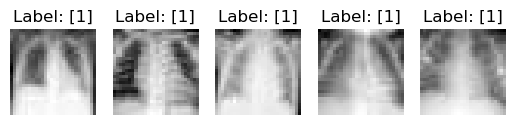

In [39]:
import matplotlib.pyplot as plt

# Carica le immagini e le etichette
X = np.load("pneumonia_images.npy")
y = np.load("pneumonia_labels.npy")

# Visualizza alcune immagini
num_images_to_display = 5

for i in range(num_images_to_display):
    # Seleziona un'immagine casuale
    index = np.random.randint(0, len(X))
    image = X[index]
    label = y[index]

    # Visualizza l'immagine con la sua etichetta
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.show()

In [38]:
print("Number of images:", X.shape[0])
positive = 0
negative = 0

for i in range(X.shape[0]):
    if(y[i]==1):
        positive += 1
    if(y[i]==0):
        negative += 1

print("Number of positive cases:", positive)
print("Number of negative cases:", negative)

Number of images: 5232
Number of positive cases: 3883
Number of negative cases: 1349


In [44]:
from sklearn.model_selection import train_test_split

# Suddivisione in set di addestramento e set di validazione
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Creation of the first CNN

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [47]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# Aggiunta di uno o più livelli completamente connessi (dense)
model.add(Dense(128, activation='relu'))

# Aggiunta del livello di output (con funzione di attivazione appropriata per il tuo problema)
model.add(Dense(1, activation='sigmoid'))


In [48]:
# Compilazione del modello
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Stampa una rappresentazione del modello
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [46]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
131/131 [==============================] - 3s 21ms/step - loss: 0.0947 - accuracy: 0.9637 - val_loss: 0.1647 - val_accuracy: 0.9341
Epoch 2/20
131/131 [==============================] - 2s 17ms/step - loss: 0.0948 - accuracy: 0.9658 - val_loss: 0.1105 - val_accuracy: 0.9608
Epoch 3/20
131/131 [==============================] - 2s 17ms/step - loss: 0.0791 - accuracy: 0.9716 - val_loss: 0.1390 - val_accuracy: 0.9532
Epoch 4/20
131/131 [==============================] - 2s 18ms/step - loss: 0.0566 - accuracy: 0.9771 - val_loss: 0.1107 - val_accuracy: 0.9647
Epoch 5/20
131/131 [==============================] - 2s 18ms/step - loss: 0.0612 - accuracy: 0.9766 - val_loss: 0.1013 - val_accuracy: 0.9666
Epoch 6/20
131/131 [==============================] - 3s 20ms/step - loss: 0.0574 - accuracy: 0.9775 - val_loss: 0.1207 - val_accuracy: 0.9580
Epoch 7/20
131/131 [==============================] - 3s 24ms/step - loss: 0.1172 - accuracy: 0.9622 - val_loss: 0.1290 - val_accuracy: 0.9513

In [55]:
from sklearn.metrics import f1_score
# Compilazione del modello
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_metric])

# Stampa una rappresentazione del modello
model.summary()

NameError: name 'f1_metric' is not defined

In [53]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20


ValueError: in user code:

    File "C:\Users\HP\miniconda3\envs\MachineLearning\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\HP\miniconda3\envs\MachineLearning\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\miniconda3\envs\MachineLearning\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\HP\miniconda3\envs\MachineLearning\lib\site-packages\keras\engine\training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\HP\miniconda3\envs\MachineLearning\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\HP\miniconda3\envs\MachineLearning\lib\site-packages\keras\engine\compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "C:\Users\HP\miniconda3\envs\MachineLearning\lib\site-packages\keras\engine\compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "C:\Users\HP\miniconda3\envs\MachineLearning\lib\site-packages\keras\engine\compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\HP\miniconda3\envs\MachineLearning\lib\site-packages\keras\engine\compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\HP\miniconda3\envs\MachineLearning\lib\site-packages\keras\engine\compile_utils.py", line 650, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "C:\Users\HP\miniconda3\envs\MachineLearning\lib\site-packages\keras\metrics\__init__.py", line 181, in get
        return deserialize(str(identifier))
    File "C:\Users\HP\miniconda3\envs\MachineLearning\lib\site-packages\keras\metrics\__init__.py", line 136, in deserialize
        return deserialize_keras_object(
    File "C:\Users\HP\miniconda3\envs\MachineLearning\lib\site-packages\keras\utils\generic_utils.py", line 769, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: f1_score. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
